In [1]:
#Import
import pandas as pd
import numpy as np

#Data
import pickle

#Utilities
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# smarts_list = [
#     '[H]',           #H atoms
#     '[C,c]',       #Carbon atoms - aliphatic or aromatic 
#     '[CX4H3]',  #Carbon sp3 with 3 hydrogens 
#     '[CX4H2]',  #Carbon sp3 with 2 hydrogens
#     '[CX4H1]',  #Carbon sp3 with 1 hydrogen
#     '[CX4H0]',  #Carbon sp3 with no hydrogens
#     '[CX3H2]=[CX3H1]',  #CH2=CH
#     '[CX3H1]=[CX3H1]',  #CH=CH
#     '[CX3H2]=[CX3H0]',  #CH2=C
#     '[cH1]',  #Aromatic carbon with 1 hydrogen
#     '[cH0]',  #Aromatic carbon with no hydrogens
#     '[c][CX4H3] ',  #CH3-aromatic carbon
#     '[c][CX4H2]',  #CH2-aromatic carbon
#     '[OX2H1]',  # -OH
#     '[CX4H3][OX2H1]',  # CH3-OH
#     '[c][OX2H1]',  # Aromatic carbon with -OH
#     '[CX4H3][CX3H0](=[O])[#6]',  # CH3-C(=O)-
#     '[CX4H2][CX3H0](=[O])[#6]',  # -CH2-C(=O)-
#     '[CX3H1](=[O])', # -CH(=O): formyl
#     '[CX4H3][CX3H0](=[O])[OX2H0]',  # CH3-C(=O)-O-
#     '[CX4H2][CX3H0](=[O])[OX2H0]',  # -CH2-C(=O)-O-
#     '[CX3H1](=[O])[OX2H0]',  # carboxylate ion
#     '[CX4H3][OX2H0][#6]',  # CH3-O-C-
#     '[CX4H2][OX2H0][#6]',  # -CH2-O-C-
#     '[CX4H1][OX2H0][#6]',  # -CH-O-C-
#     '[CX3H0](=[O])[OX2H1]',  # -COOH
#     '[CX3H1](=[O])[OX2H1]', # HCOOH
#     '[OX2H0][CX3H0](=[O])',  # -O-C(=O)-
#     '[OX2H1][CX4H2][CX4H2][OX2H0][#6]',  # HO-CH2-CH2-O-C-
#     '[OX2H0][CX4H1][OX2H0]',  # -O-CH-O-
#     '[cX3H0][O][cX3H0]',  # Aromatic ether
#     '[#6][CX3H1](=O)',  # -C-CHO
#     '[#6][OX2H0][#6]',  # -C-O-C-
#     '[#6][CX3H0](=[O])[#6]',  # -C-C(=O)-C-
#     '[#6][CX4H2][OX2H1]',  # -C-CH2-OH
#     '[#6][CX4H1]([#6])[OX2H1]',  # tertiary alcohol -C-CH(-C)-OH
#     '[CX4H3][CX3H0](=[O])[OX2H1]',  # CH3-C(=O)-OH
#     '[#6][CX3H0](=[O])[#8]',  #-C-C(=O)-O-
#     '[O;R]', #Oxygen in ring
#     '[C;R]', #Ring carbon
#     '[c;R]', #Aromatic carbon
#     '[#8].[#8]',  #Molecules containing two oxygen atoms
# ]

# smarts_labels = [f'X{i+1}' for i in range(len(smarts_list))]

In [3]:
df = pd.read_excel("DIPPR.xlsx", sheet_name=0)

In [4]:
smarts_list = [
    '[H]',    # H atoms
    '[C,c]',  # Carbon atoms - aliphatic or aromatic
    '[O]' ,   # Oxygen atoms
    '[C;R]',  # Ring carbon
    '[c;R]',  # Aromatic carbon
    '[O;R]',  # Oxygen in ring
    '[*R]',  # Any atom in a ring
    '[OX2]', # OH and ether
    '[OX2H]', # OH
    '[c][OX2H]', # Phenolic OH
    '[OX2H0]', # Ether
    '[CX3][OX1]', # Carbonyl
    '[#6][CX3H0](=O)[#6]', #Ketone
    '[CX3H1](=O)', # Aldehyde
    '[CX3](=O)[OX2H]', # Carboxylic acid
    '[CX3](=O)O[CX3](=O)', # Anhydride
    '[CX3H0](=O)[OX2H0][#6]',  # Ester
    '[CX4H0]' ,  # Carbon sp3 with no hydrogens
    '[CX4H1]',  # Carbon sp3 with 1 hydrogen
    '[CX4H2]',  # Carbon sp3 with 2 hydrogens
    '[CX4H3]',  # Carbon sp3 with 3 hydrogens
    '[CX3]=[CX3]', # Alkenes
    '[#8].[#8]',  # Molecules containing two oxygen atoms
    '[OX2H].[OX2H]', # At least 2 OH
    '[OX2H].[OX2H].[OX2H]', # At least 3 OH
    '[CX4][OX2H]', # Typical Alcohols
    '[CX4H0][OX2H]', # Tertiary Alcohols
    '[CX4H1][OX2H]', # Secondary Alcohols
    '[CX4H2][OX2H]', # Primary Alcohols
    '[CX3H2]=[CX3H1]',  # CH2=CH-
    '[CX3H2]=[CX3H0]',  # CH2=C()-
    '[CX3H1]=[CX3H1]',  # -CH=CH-
    '[OX2H0].[OX2H0]', # At least 2 ethers
    '[OX2H0].[OX2H0].[OX2H0]', # At least 3 ethers 
    '[c][OX2][c]', # Aromatic-Aromatic ether
    '[c][OX2][C]' , # Aromatic-Aliphatic ether
    '[#8][#6][#6][#8]', #1,2-diol or diether
    '[#8][#6][#6][#6][#8]', #1,3-diol or diether
    '[#6;R]-O-[#6;R]', #Cyclic ether
]

smarts_labels = [f'X{i+1}' for i in range(len(smarts_list))]

In [5]:
# Convert SMILES to Mol objects
df['mol'] = df['SMILE'].apply(Chem.MolFromSmiles)

# Add explicit hydrogens to all molecules
df['mol'] = df['mol'].apply(lambda mol: Chem.AddHs(mol) if mol else None)

# Generate binary SMARTS descriptors
for smarts, label in zip(smarts_list, smarts_labels):
    pattern = Chem.MolFromSmarts(smarts)
    df[label] = df['mol'].apply(lambda mol: len(mol.GetSubstructMatches(pattern)) if mol else 0)

In [6]:
# df = df.loc[:, df.nunique() != 1]

In [7]:
# Calculate molecular weight and add it to the DataFrame
df['MolWeight'] = df['mol'].apply(lambda mol: Descriptors.MolWt(mol) if mol else None)

MODEL BUILDING (SVR)

In [8]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, GroupKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [9]:
X = df.drop(columns=['Name', 'SMILE', 'CAS', 'Family', 'mol', 'K'])
y = df['K']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1.0],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters: {'C': 10, 'epsilon': 0.01, 'gamma': 0.01}


In [12]:
# Predict and evaluate
y_pred = best_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.3f}")
print(f"Test R²: {r2:.3f}")

Test RMSE: 0.006
Test R²: 0.959


INTERPOLATED DF

In [13]:
df = pd.read_excel("DIPPR.xlsx", sheet_name=0)
df.drop(columns=['Name', 'CAS', 'Family'], inplace=True)

In [14]:
# Group by SMILE and T, take mean of K
df_reduced = df.groupby(['SMILE', 'T'], as_index=False)['K'].mean()

In [15]:
# # Linear interpolation
# interpolated_dfs = []

# for smile, group in df_reduced.groupby('SMILE'):
#     group = group.sort_values('T')

#     # Interpolate over a denser T range if desired
#     T_new = np.linspace(group['T'].min(), group['T'].max(), num=10)
#     K_new = np.interp(T_new, group['T'], group['K'])  # Linear interpolation

#     interpolated = pd.DataFrame({
#         'SMILE': smile,
#         'T': T_new,
#         'K': K_new
#     })
#     interpolated_dfs.append(interpolated)

# result = pd.concat(interpolated_dfs, ignore_index=True)

In [16]:
#Polynpomial interpolation
interpolated_dfs = []

for smile, group in df_reduced.groupby('SMILE'):
    group = group.sort_values('T')

    # Reduce to at most 10 diverse points (evenly spread)
    if len(group) > 10:
        indices = np.linspace(0, len(group) - 1, 10, dtype=int)
        group = group.iloc[indices].reset_index(drop=True)

    # Interpolate over a denser T range if desired
    T_new = np.linspace(group['T'].min(), group['T'].max(), num=10)

    if len(group) >= 4: # Change if needed
        # Safe to fit cubic
        coeffs = np.polyfit(group['T'], group['K'], deg=2)
        poly = np.poly1d(coeffs)
        K_new = poly(T_new)
    
    else:
        # Fall back to linear if not enough points
        coeffs = np.polyfit(group['T'], group['K'], deg=1)
        poly = np.poly1d(coeffs)
        K_new = poly(T_new)


    interpolated = pd.DataFrame({
        'SMILE': smile,
        'T': T_new,
        'K': K_new
    })
    interpolated_dfs.append(interpolated)

result = pd.concat(interpolated_dfs, ignore_index=True)

In [17]:
# Convert SMILES to Mol objects
result['mol'] = result['SMILE'].apply(Chem.MolFromSmiles)

# Add explicit hydrogens to all molecules
result['mol'] = result['mol'].apply(lambda mol: Chem.AddHs(mol) if mol else None)

# Generate binary SMARTS descriptors
for smarts, label in zip(smarts_list, smarts_labels):
    pattern = Chem.MolFromSmarts(smarts)
    result[label] = result['mol'].apply(lambda mol: len(mol.GetSubstructMatches(pattern)) if mol else 0)

# Calculate molecular weight and add it to the DataFrame
result['MolWeight'] = result['mol'].apply(lambda mol: Descriptors.MolWt(mol) if mol else None)

In [18]:
# # Remove columns with constant values
# result = result.loc[:, result.nunique() != 1]

In [19]:
result

,SMILE,T,K,mol,X1,X2,X3,X4,X5,X6,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,MolWeight
0,C(=O)O,285.150000,0.271481,<rdkit.Chem.rdchem.Mol object at 0x000002C2E6E...,2,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,46.025
1,C(=O)O,294.877778,0.269537,<rdkit.Chem.rdchem.Mol object at 0x000002C2E6E...,2,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,46.025
2,C(=O)O,304.605556,0.267800,<rdkit.Chem.rdchem.Mol object at 0x000002C2E6E...,2,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,46.025
3,C(=O)O,314.333333,0.266270,<rdkit.Chem.rdchem.Mol object at 0x000002C2E6E...,2,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,46.025
4,C(=O)O,324.061111,0.264949,<rdkit.Chem.rdchem.Mol object at 0x000002C2E6E...,2,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,46.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,c1ccccc1Cc2ccccc2,403.061111,0.123523,<rdkit.Chem.rdchem.Mol object at 0x000002C2E6E...,12,13,0,0,12,0,...,0,0,0,0,0,0,0,0,0,168.239
1736,c1ccccc1Cc2ccccc2,421.583333,0.121042,<rdkit.Chem.rdchem.Mol object at 0x000002C2E6E...,12,13,0,0,12,0,...,0,0,0,0,0,0,0,0,0,168.239
1737,c1ccccc1Cc2ccccc2,440.105556,0.118482,<rdkit.Chem.rdchem.Mol object at 0x000002C2E6E...,12,13,0,0,12,0,...,0,0,0,0,0,0,0,0,0,168.239
1738,c1ccccc1Cc2ccccc2,458.627778,0.115842,<rdkit.Chem.rdchem.Mol object at 0x000002C2E6E...,12,13,0,0,12,0,...,0,0,0,0,0,0,0,0,0,168.239


In [ ]:
# result.to_excel('../report/SDB2.xlsx', index=False)

In [ ]:
X = result.drop(columns=['SMILE', 'mol', 'K'])
y = result['K']

# Compound Out
from sklearn.model_selection import GroupShuffleSplit

# Use SMILE as the group identifier for splitting
groups = result['SMILE']
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

Best parameters: {'C': 50, 'epsilon': 0.01, 'gamma': 0.01}


In [ ]:
# X_test_smiles = result.iloc[test_idx]
# # Save to excel
# X_test_smiles.to_excel("X_test_smiles_oc.xlsx", index=False)

In [ ]:
# # Grid search Block
# # Define parameter grid
# param_grid = {
#     'C': [50, 100, 200, 300],
#     'epsilon': [0.001, 0.005, 0.01, 0.1],
#     'gamma': [0.001, 0.005, 0.01, 0.1, 1]
# }

# # Grid search with 5-fold cross-validation
# grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# # Best parameters and model
# print("Best parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

In [ ]:
# # Fit the model
# best_model.fit(X_train_scaled, y_train)

# # Predict and evaluate
# y_pred = best_model.predict(X_test_scaled)
# y_train_pred = best_model.predict(X_train)
# rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
# r2_train = r2_score(y_train, y_train_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"Train RMSE: {rmse_train:.3f}")
# print(f"Train R²: {r2_train:.3f}")
# print(f"Test RMSE: {rmse:.3f}")
# print(f"Test R²: {r2:.3f}")

In [2563]:
groups_train = groups.iloc[train_idx]  # Important!
params = {'C': 45.515217222968296, 'epsilon': 0.004022852222818151, 'gamma': 0.00020233531522643092}
model = SVR(kernel='rbf', **params)

# Inner CV with GroupKFold
gkf = GroupKFold(n_splits=5)

# Custom RMSE scorer (no use of 'squared' argument)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Perform cross-validation on training data
cv_scores = cross_val_score(model, X_train, y_train,
                            cv=gkf.split(X_train, y_train, groups=groups_train),
                            scoring=rmse_scorer)
r2_scores = cross_val_score(model, X_train, y_train,
                            cv=gkf.split(X_train, y_train, groups=groups_train),
                            scoring='r2')

print(f"Cross-validated RMSE scores: {-cv_scores}")
print(f"Mean CV RMSE: {-np.mean(cv_scores):.3f}")
print(f"Cross-validated R² scores: {r2_scores}")
print(f"Mean CV R²: {np.mean(r2_scores):.3f}")

Cross-validated RMSE scores: [0.01327806 0.0152009  0.01425615 0.01688695 0.01129944]
Mean CV RMSE: 0.014
Cross-validated R² scores: [0.62339601 0.49059692 0.70608895 0.77632316 0.89322753]
Mean CV R²: 0.698


In [2564]:
# Final fit and evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print(f"Train RMSE: {rmse_train:.3f}")
print(f"Train R²: {r2_train:.3f}")
print(f"Test RMSE: {rmse_test:.3f}")
print(f"Test R²: {r2_test:.3f}")

Train RMSE: 0.003
Train R²: 0.987
Test RMSE: 0.007
Test R²: 0.950


In [2565]:
sdb = pd.read_excel("sdb1_unique_pures+predict.xlsx", sheet_name=0)

# Convert SMILES to Mol objects
sdb['mol'] = sdb['SMILES'].apply(Chem.MolFromSmiles)

# Add explicit hydrogens to all molecules
sdb['mol'] = sdb['mol'].apply(lambda mol: Chem.AddHs(mol) if mol else None)

# Generate binary SMARTS descriptors
for smarts, label in zip(smarts_list, smarts_labels):
    pattern = Chem.MolFromSmarts(smarts)
    sdb[label] = sdb['mol'].apply(lambda mol: len(mol.GetSubstructMatches(pattern)) if mol else 0)

# Calculate molecular weight and add it to the DataFrame
sdb['MolWeight'] = sdb['mol'].apply(lambda mol: Descriptors.MolWt(mol) if mol else None)

X_sdb = sdb.drop(columns=['Name', 'SMILES', 'mol', 'K', 'K_pred', '% difference'])
y_sdb = sdb['K']

preds_svr = model.predict(X_sdb)
r2_svr = r2_score(sdb['K'], preds_svr)
r2_moreno= r2_score(sdb['K'], sdb['K_pred'])
print(f"R² for svr on sdb predictions: {r2_svr:.3f}")
print(f"R² for Moreno's predictions: {r2_moreno:.3f}")

R² for svr on sdb predictions: 0.962
R² for Moreno's predictions: 0.949


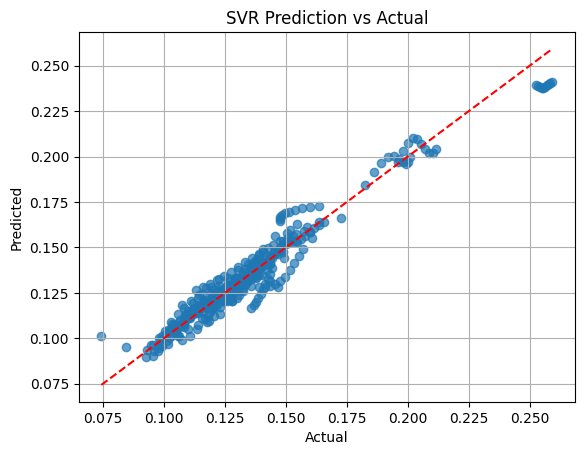

In [2566]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR Prediction vs Actual')
plt.grid(True)
plt.show()

In [2567]:
with open('svr_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [2405]:
# Identify outliers
# Use SMILE as the group identifier for splitting
groups = result['SMILE']
train_idx, test_idx = next(gss.split(result, y, groups=groups))

X_train, X_test = result.iloc[train_idx], result.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [2406]:
# Calculate absolute differences
diff = np.abs(y_pred - y_test)

# Define a threshold for "differ a lot"
threshold = 0.015

# Get indices where difference exceeds threshold
indices = np.where(diff > threshold)[0]

print("Indices where y_pred and y_test differ a lot:", indices)

Indices where y_pred and y_test differ a lot: [252 253 254 255 256 257 258 259 270 271 272 273 274 275 276 277 278 279
 296 297 298 299 300 301 302 303 304 305 306 307 308 309]


In [2407]:
X_test.iloc[indices]

,SMILE,T,K,mol,X1,X2,X3,X4,X5,X6,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,MolWeight
1262,O=C(OC)CCCCCCC/C=C\C/C=C\CCCCC,347.409633,0.136643,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,34,19,2,0,0,0,...,0,2,0,0,0,0,0,0,0,294.479
1263,O=C(OC)CCCCCCC/C=C\C/C=C\CCCCC,370.024300,0.133713,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,34,19,2,0,0,0,...,0,2,0,0,0,0,0,0,0,294.479
1264,O=C(OC)CCCCCCC/C=C\C/C=C\CCCCC,392.638967,0.130658,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,34,19,2,0,0,0,...,0,2,0,0,0,0,0,0,0,294.479
1265,O=C(OC)CCCCCCC/C=C\C/C=C\CCCCC,415.253633,0.127476,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,34,19,2,0,0,0,...,0,2,0,0,0,0,0,0,0,294.479
1266,O=C(OC)CCCCCCC/C=C\C/C=C\CCCCC,437.868300,0.124169,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,34,19,2,0,0,0,...,0,2,0,0,0,0,0,0,0,294.479
1267,O=C(OC)CCCCCCC/C=C\C/C=C\CCCCC,460.482967,0.120736,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,34,19,2,0,0,0,...,0,2,0,0,0,0,0,0,0,294.479
1268,O=C(OC)CCCCCCC/C=C\C/C=C\CCCCC,483.097633,0.117178,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,34,19,2,0,0,0,...,0,2,0,0,0,0,0,0,0,294.479
1269,O=C(OC)CCCCCCC/C=C\C/C=C\CCCCC,505.712300,0.113493,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,34,19,2,0,0,0,...,0,2,0,0,0,0,0,0,0,294.479
1280,O=COC(C)C,286.000000,0.138852,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,8,4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,88.106
1281,O=COC(C)C,293.222222,0.136078,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,8,4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,88.106


EXTRA TREES

In [2408]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Use SMILE as the group identifier for splitting
groups = result['SMILE']
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

model = ExtraTreesRegressor(random_state=42)

grid = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = best_model.score(X_test, y_test)
print(f"Test R²: {test_r2:.3f}")


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R²: 0.4799804807904053
Test R²: 0.835


In [2409]:
importances = best_model.feature_importances_

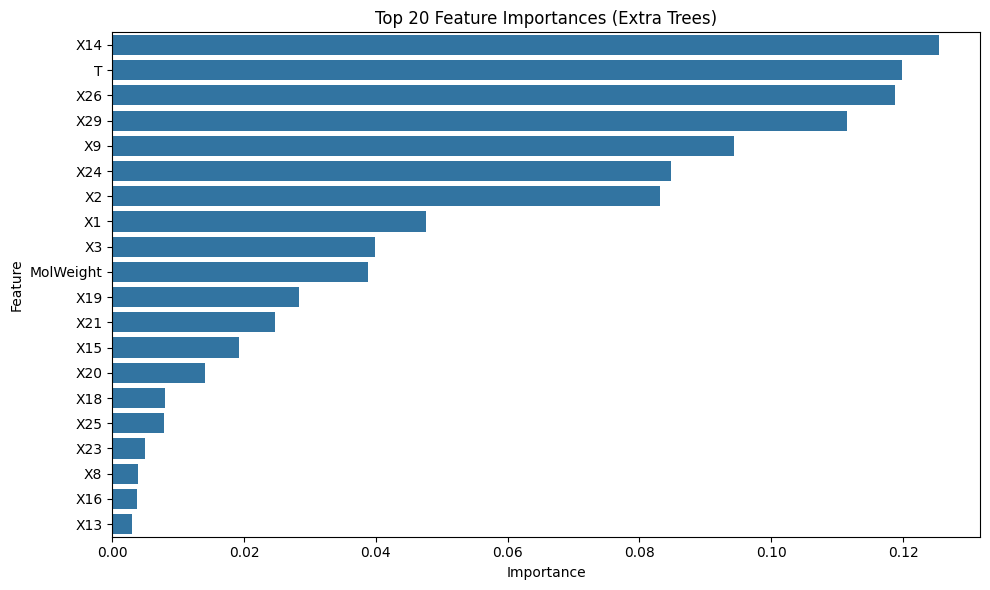

In [2410]:
importances = best_model.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top N
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values[:top_n], y=feat_imp.index[:top_n])
plt.title(f"Top {top_n} Feature Importances (Extra Trees)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [2411]:
# Identify outliers
# Use SMILE as the group identifier for splitting
groups = result['SMILE']
train_idx, test_idx = next(gss.split(result, y, groups=groups))

X_train, X_test = result.iloc[train_idx], result.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Calculate absolute differences
diff = np.abs(y_pred - y_test)

# Define a threshold for "differ a lot"
threshold = 0.015

# Get indices where difference exceeds threshold
indices = np.where(diff > threshold)[0]

print("Indices where y_pred and y_test differ a lot:", indices)

Indices where y_pred and y_test differ a lot: [  0   1  17  18  19  45  46  47  48  49  58  59 110 111 112 113 114 115
 116 117 118 119 217 218 219 240 241 245 246 247 248 249 270 271 272 273
 274 275 276 277 278 279 300 301 302 303 304 305 306 307 308 309 340 341
 342 343 344 345 346 347 348 349]


In [2412]:
X_test.iloc[indices]

,SMILE,T,K,mol,X1,X2,X3,X4,X5,X6,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,MolWeight
90,C1OCCOC1,293.150000,0.163539,<rdkit.Chem.rdchem.Mol object at 0x0000029E037...,8,4,2,4,0,2,...,0,0,1,0,0,0,2,0,2,88.106
91,C1OCCOC1,296.483333,0.159778,<rdkit.Chem.rdchem.Mol object at 0x0000029E037...,8,4,2,4,0,2,...,0,0,1,0,0,0,2,0,2,88.106
127,C=C(C)C(=O)OCCCCCCCCCC,396.910000,0.113782,<rdkit.Chem.rdchem.Mol object at 0x0000029E037...,26,14,2,0,0,0,...,0,0,0,0,0,0,0,0,0,226.360
128,C=C(C)C(=O)OCCCCCCCCCC,410.280000,0.110613,<rdkit.Chem.rdchem.Mol object at 0x0000029E037...,26,14,2,0,0,0,...,0,0,0,0,0,0,0,0,0,226.360
129,C=C(C)C(=O)OCCCCCCCCCC,423.650000,0.107474,<rdkit.Chem.rdchem.Mol object at 0x0000029E037...,26,14,2,0,0,0,...,0,0,0,0,0,0,0,0,0,226.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,c1ccccc1(O),401.261111,0.147769,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,6,6,1,0,6,0,...,0,0,0,0,0,0,0,0,0,94.113
1666,c1ccccc1(O),418.683333,0.145699,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,6,6,1,0,6,0,...,0,0,0,0,0,0,0,0,0,94.113
1667,c1ccccc1(O),436.105556,0.143544,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,6,6,1,0,6,0,...,0,0,0,0,0,0,0,0,0,94.113
1668,c1ccccc1(O),453.527778,0.141305,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,6,6,1,0,6,0,...,0,0,0,0,0,0,0,0,0,94.113


In [2413]:
with open('et_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

XGBoost

In [2576]:
from xgboost import XGBRegressor, plot_importance

X = result.drop(columns=['SMILE', 'mol', 'K'])
y = result['K']

# Use SMILE as the group identifier for splitting
groups = result['SMILE']
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [ ]:
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 4, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.26527892810287373, 0.3],
#     'subsample': [0.8098354719948674, 1.0]
# }

# model = XGBRegressor(random_state=42)

# grid = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid.fit(X_train, y_train)

# print("Best parameters:", grid.best_params_)
# print("Best CV R²:", grid.best_score_)

# best_model = grid.best_estimator_
# y_pred = best_model.predict(X_test)
# test_r2 = best_model.score(X_test, y_test)
# print(f"Test R²: {test_r2:.3f}")

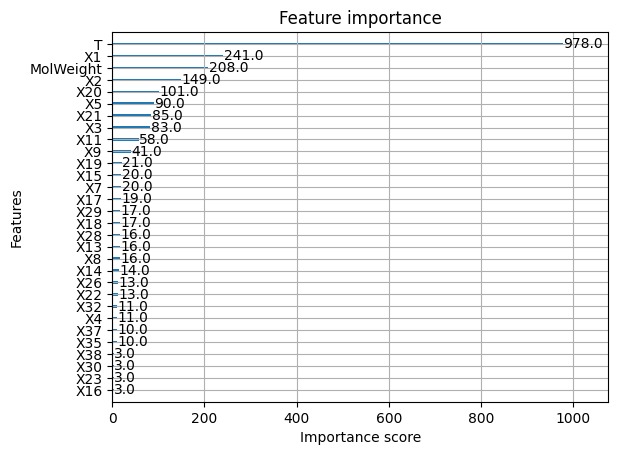

In [2569]:
# Get raw importances
importances = best_model.feature_importances_

# Plot importances
plot_importance(best_model)
plt.show()

In [2578]:
# Overwrite with custom params
custom_params = {'n_estimators': 290, 'max_depth': 3, 'learning_rate': 0.27864475109681996, 'subsample': 0.9062537228873638}

best_model = XGBRegressor(**custom_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"Final Test R²: {test_r2:.3f}")

Final Test R²: 0.967


In [2579]:
# Identify outliers
# Use SMILE as the group identifier for splitting
groups = result['SMILE']
train_idx, test_idx = next(gss.split(result, y, groups=groups))

X_train, X_test = result.iloc[train_idx], result.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Calculate absolute differences
diff = np.abs(y_pred - y_test)

# Define a threshold for "differ a lot"
threshold = 0.013

# Get indices where difference exceeds threshold
indices = np.where(diff > threshold)[0]

print("Indices where y_pred and y_test differ a lot:", indices)

Indices where y_pred and y_test differ a lot: [ 18  19 106 107 109 238 239 240 247 248 249 330 349]


In [2580]:
X_test.iloc[indices]

,SMILE,T,K,mol,X1,X2,X3,X4,X5,X6,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,MolWeight
128,C=C(C)C(=O)OCCCCCCCCCC,410.280000,0.110613,<rdkit.Chem.rdchem.Mol object at 0x0000029E091...,26,14,2,0,0,0,...,0,0,0,0,0,0,0,0,0,226.360
129,C=C(C)C(=O)OCCCCCCCCCC,423.650000,0.107474,<rdkit.Chem.rdchem.Mol object at 0x0000029E091...,26,14,2,0,0,0,...,0,0,0,0,0,0,0,0,0,226.360
416,CC(C)C(C)C(C)C,307.946667,0.101157,<rdkit.Chem.rdchem.Mol object at 0x0000029E091...,18,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,114.232
417,CC(C)C(C)C(C)C,316.094444,0.099282,<rdkit.Chem.rdchem.Mol object at 0x0000029E091...,18,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,114.232
419,CC(C)C(C)C(C)C,332.390000,0.095577,<rdkit.Chem.rdchem.Mol object at 0x0000029E091...,18,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,114.232
1138,CCCOC(=O)CCC(=O)OCCC,475.927778,0.128913,<rdkit.Chem.rdchem.Mol object at 0x0000029E091...,18,10,4,0,0,0,...,0,0,1,0,0,0,0,0,0,202.250
1139,CCCOC(=O)CCC(=O)OCCC,498.150000,0.125394,<rdkit.Chem.rdchem.Mol object at 0x0000029E091...,18,10,4,0,0,0,...,0,0,1,0,0,0,0,0,0,202.250
1170,CCOCC,193.000000,0.172511,<rdkit.Chem.rdchem.Mol object at 0x0000029E091...,10,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,74.123
1177,CCOCC,379.783333,0.094621,<rdkit.Chem.rdchem.Mol object at 0x0000029E091...,10,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,74.123
1178,CCOCC,406.466667,0.084385,<rdkit.Chem.rdchem.Mol object at 0x0000029E091...,10,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,74.123


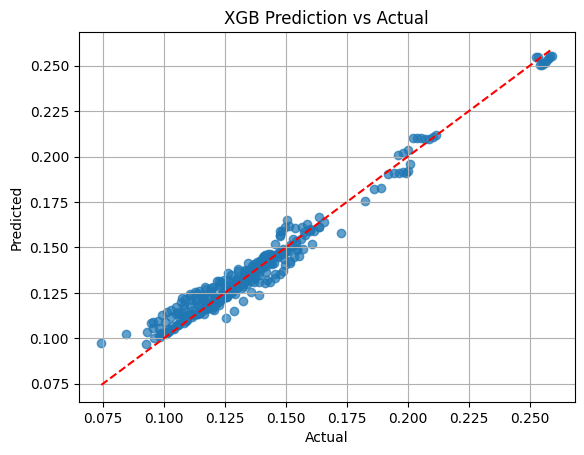

In [2581]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGB Prediction vs Actual')
plt.grid(True)
plt.show()

In [2420]:
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Random Forest

In [2421]:
from sklearn.ensemble import RandomForestRegressor

# Use SMILE as the group identifier for splitting
groups = result['SMILE']
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)

Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [2422]:
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

Test MSE: 0.000
Test R²: 0.943


APPLY MODELS TO DB

In [2423]:
sdb = pd.read_excel("sdb1_unique_pures+predict.xlsx", sheet_name=0)

In [2424]:
sdb

,Name,SMILES,T,K,K_pred,% difference
0,"1,1'-oxybis(2-methoxyethane)",COCCOCCOC,298.15,0.153800,0.170709,0.109941
1,"1,1'-oxybis(2-methoxyethane)",COCCOCCOC,323.15,0.147300,0.164745,0.118432
2,"1,1'-oxybisbutane",CCCCOCCCC,298.15,0.125700,0.129691,0.031750
3,"1,1'-oxybisbutane",CCCCOCCCC,323.15,0.124900,0.122389,0.020104
4,"1,1'-oxybisbutane",CCCCOCCCC,273.15,0.135500,0.137057,0.011491
...,...,...,...,...,...,...
208,benzene,c1ccccc1,288.15,0.146002,0.142466,0.024219
209,heptane,CCCCCCC,283.15,0.126200,0.126307,0.000848
210,"2,2,4-trimethylpentane",CC(C)CC(C)(C)C,295.20,0.096700,0.099506,0.029020
211,hexadecane,CCCCCCCCCCCCCCCC,298.80,0.143500,0.141286,0.015429


In [2425]:
# Convert SMILES to Mol objects
sdb['mol'] = sdb['SMILES'].apply(Chem.MolFromSmiles)

# Add explicit hydrogens to all molecules
sdb['mol'] = sdb['mol'].apply(lambda mol: Chem.AddHs(mol) if mol else None)

# Generate binary SMARTS descriptors
for smarts, label in zip(smarts_list, smarts_labels):
    pattern = Chem.MolFromSmarts(smarts)
    sdb[label] = sdb['mol'].apply(lambda mol: len(mol.GetSubstructMatches(pattern)) if mol else 0)

# Calculate molecular weight and add it to the DataFrame
sdb['MolWeight'] = sdb['mol'].apply(lambda mol: Descriptors.MolWt(mol) if mol else None)

In [2426]:
sdb

,Name,SMILES,T,K,K_pred,% difference,mol,X1,X2,X3,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,MolWeight
0,"1,1'-oxybis(2-methoxyethane)",COCCOCCOC,298.15,0.153800,0.170709,0.109941,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,14,6,3,...,0,0,3,1,0,0,2,0,0,134.175
1,"1,1'-oxybis(2-methoxyethane)",COCCOCCOC,323.15,0.147300,0.164745,0.118432,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,14,6,3,...,0,0,3,1,0,0,2,0,0,134.175
2,"1,1'-oxybisbutane",CCCCOCCCC,298.15,0.125700,0.129691,0.031750,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,18,8,1,...,0,0,0,0,0,0,0,0,0,130.231
3,"1,1'-oxybisbutane",CCCCOCCCC,323.15,0.124900,0.122389,0.020104,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,18,8,1,...,0,0,0,0,0,0,0,0,0,130.231
4,"1,1'-oxybisbutane",CCCCOCCCC,273.15,0.135500,0.137057,0.011491,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,18,8,1,...,0,0,0,0,0,0,0,0,0,130.231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,benzene,c1ccccc1,288.15,0.146002,0.142466,0.024219,<rdkit.Chem.rdchem.Mol object at 0x0000029E037...,6,6,0,...,0,0,0,0,0,0,0,0,0,78.114
209,heptane,CCCCCCC,283.15,0.126200,0.126307,0.000848,<rdkit.Chem.rdchem.Mol object at 0x0000029E037...,16,7,0,...,0,0,0,0,0,0,0,0,0,100.205
210,"2,2,4-trimethylpentane",CC(C)CC(C)(C)C,295.20,0.096700,0.099506,0.029020,<rdkit.Chem.rdchem.Mol object at 0x0000029E038...,18,8,0,...,0,0,0,0,0,0,0,0,0,114.232
211,hexadecane,CCCCCCCCCCCCCCCC,298.80,0.143500,0.141286,0.015429,<rdkit.Chem.rdchem.Mol object at 0x0000029E038...,34,16,0,...,0,0,0,0,0,0,0,0,0,226.448


In [2427]:
X = sdb.drop(columns=['Name', 'SMILES', 'mol', 'K', 'K_pred', '% difference'])
y = sdb['K']

In [2428]:
with open('xgb_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

preds_xgb = xgb_model.predict(X)

with open('et_model.pkl', 'rb') as f:
    et_model = pickle.load(f)

preds_et = et_model.predict(X)

In [2429]:
r2_xgb = r2_score(sdb['K'], preds_xgb)
r2_et = r2_score(sdb['K'], preds_et)
r2_moreno= r2_score(sdb['K'], sdb['K_pred'])
print(f"R² for xgb predictions: {r2_xgb:.3f}")
print(f"R² for et predictions: {r2_et:.3f}")
print(f"R² for Moreno's predictions: {r2_moreno:.3f}")

R² for xgb predictions: 0.971
R² for et predictions: 0.915
R² for Moreno's predictions: 0.949


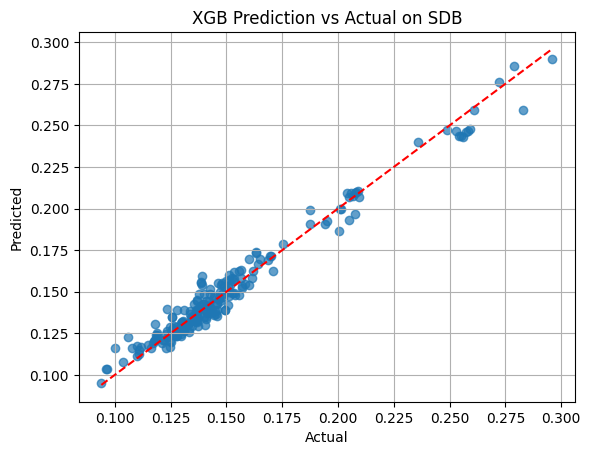

In [2430]:
plt.scatter(y, preds_xgb, alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGB Prediction vs Actual on SDB')
plt.grid(True)
plt.show()

In [2431]:
# Calculate absolute differences
diff = np.abs(preds_xgb - y)

# Define a threshold for "differ a lot"
threshold = 0.015

# Get indices where difference exceeds threshold
indices = np.where(diff > threshold)[0]

print("Indices where y_pred and y_test differ a lot:", indices)

Indices where y_pred and y_test differ a lot: [  6  27  33  39 143 145 149 150]


In [2432]:
sdb.iloc[indices]

,Name,SMILES,T,K,K_pred,% difference,mol,X1,X2,X3,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,MolWeight
6,"1,2,3-propanetriol",OCC(O)CO,313.15,0.283000,0.250030,0.116502,<rdkit.Chem.rdchem.Mol object at 0x0000029DF6E...,8,3,3,...,0,0,0,0,0,0,2,1,0,92.094
27,1-heptanol,CCCCCCCO,301.15,0.139295,0.156435,0.123050,<rdkit.Chem.rdchem.Mol object at 0x0000029E01F...,16,7,1,...,0,0,0,0,0,0,0,0,0,116.204
33,1-hexanol,CCCCCCO,301.15,0.138583,0.156025,0.125859,<rdkit.Chem.rdchem.Mol object at 0x0000029E01F...,14,6,1,...,0,0,0,0,0,0,0,0,0,102.177
39,"2,4,4-trimethyl-1-pentene",CC(=C)CC(C)(C)C,273.15,0.106000,0.111010,0.047264,<rdkit.Chem.rdchem.Mol object at 0x0000029E01F...,16,8,0,...,0,0,0,0,0,0,0,0,0,112.216
143,1-butanol,CCCCO,301.15,0.138499,0.156844,0.132453,<rdkit.Chem.rdchem.Mol object at 0x0000029DFAD...,10,4,1,...,0,0,0,0,0,0,0,0,0,74.123
145,1-pentanol,CCCCCO,301.15,0.138918,0.156149,0.124037,<rdkit.Chem.rdchem.Mol object at 0x0000029DFAD...,12,5,1,...,0,0,0,0,0,0,0,0,0,88.150
149,2-methyl-1-propanol,CC(C)CO,301.15,0.123511,0.141007,0.141659,<rdkit.Chem.rdchem.Mol object at 0x0000029DFAD...,10,4,1,...,0,0,0,0,0,0,0,0,0,74.123
150,2-methyl-2-propanol,CC(C)(C)O,301.15,0.100065,0.116229,0.161541,<rdkit.Chem.rdchem.Mol object at 0x0000029DFAD...,10,4,1,...,0,0,0,0,0,0,0,0,0,74.123


In [2433]:
db = pd.read_excel("DB_unique.xlsx", sheet_name=0)
# Convert SMILES to Mol objects
db['mol'] = db['SMILES'].apply(Chem.MolFromSmiles)

# Add explicit hydrogens to all molecules
db['mol'] = db['mol'].apply(lambda mol: Chem.AddHs(mol) if mol else None)

# Generate binary SMARTS descriptors
for smarts, label in zip(smarts_list, smarts_labels):
    pattern = Chem.MolFromSmarts(smarts)
    db[label] = db['mol'].apply(lambda mol: len(mol.GetSubstructMatches(pattern)) if mol else 0)

# Calculate molecular weight and add it to the DataFrame
db['MolWeight'] = db['mol'].apply(lambda mol: Descriptors.MolWt(mol) if mol else None)

In [2434]:
X_db = db.drop(columns=['Name', 'SMILES', 'mol'])

In [2435]:
db['K'] = xgb_model.predict(X_db)

In [2436]:
db

,Name,SMILES,T,mol,X1,X2,X3,X4,X5,X6,...,X32,X33,X34,X35,X36,X37,X38,X39,MolWeight,K
0,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,283.88,<rdkit.Chem.rdchem.Mol object at 0x0000029E020...,20,10,1,6,0,0,...,0,0,0,0,0,0,0,0,156.269,0.131077
1,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,293.78,<rdkit.Chem.rdchem.Mol object at 0x0000029E020...,20,10,1,6,0,0,...,0,0,0,0,0,0,0,0,156.269,0.128675
2,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,293.81,<rdkit.Chem.rdchem.Mol object at 0x0000029E020...,20,10,1,6,0,0,...,0,0,0,0,0,0,0,0,156.269,0.128675
3,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,293.87,<rdkit.Chem.rdchem.Mol object at 0x0000029E020...,20,10,1,6,0,0,...,0,0,0,0,0,0,0,0,156.269,0.128675
4,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,303.60,<rdkit.Chem.rdchem.Mol object at 0x0000029E020...,20,10,1,6,0,0,...,0,0,0,0,0,0,0,0,156.269,0.126299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,undecane,CCCCCCCCCCC,362.32,<rdkit.Chem.rdchem.Mol object at 0x0000029E021...,24,11,0,0,0,0,...,0,0,0,0,0,0,0,0,156.313,0.112072
2710,undecane,CCCCCCCCCCC,362.34,<rdkit.Chem.rdchem.Mol object at 0x0000029E021...,24,11,0,0,0,0,...,0,0,0,0,0,0,0,0,156.313,0.112072
2711,undecane,CCCCCCCCCCC,362.37,<rdkit.Chem.rdchem.Mol object at 0x0000029E021...,24,11,0,0,0,0,...,0,0,0,0,0,0,0,0,156.313,0.112072
2712,undecane,CCCCCCCCCCC,362.51,<rdkit.Chem.rdchem.Mol object at 0x0000029E021...,24,11,0,0,0,0,...,0,0,0,0,0,0,0,0,156.313,0.112072


In [ ]:
db_new = db[['Name', 'SMILES', 'T', 'K']].copy()

# Save the new database with predictions
db_new.to_excel("DB_new_predictions.xlsx", index=False)